In [1]:
import json

In [2]:
def txt_to_dzn(path, sl=None):
    # print(path)
    name = path.split(".")[0]
    with open(path) as f:
        data = json.load(f)
    
    
    alphabet = "{"
    for char in data["alphabet"]:
        alphabet += f"{char},"
    alphabet = alphabet[:-1]
    alphabet += "}"
    alphabet = f"Alphabet = {alphabet};\n"
    # print(alphabet)
    
    num_strings = data["num_strings"]
    ns = f"ns = {num_strings};\n"
    # print(ns)
    
    max_length = max(data["str_length"])
    nc = f"nc = {max_length};\n"
    # print(nc)
    
    sol_length = max_length
    if sl is not None:
        sol_length = sl
        
    sl = f"sl = {sol_length};\n"
    
    neighbours = "[| "
    for s in data["strings"]:
        for i in range(max(max_length, len(s))):
            if i < len(s):
                neighbours += f"I({s[i]}),"
            else:
                neighbours += f"Null,"
        neighbours = neighbours[:-1]
        neighbours += " | "
    neighbours = "neighbours = " + neighbours[:-1] + "];\n"
    # print(neighbours)
    
    with open(f'{name}.dzn', 'w') as f_new:
        f_new.write(alphabet)
        f_new.write(ns)
        f_new.write(nc)
        f_new.write(sl)
        f_new.write(neighbours)

In [3]:
import os
def all_txt_to_dzn(path_to_instances, sl=None):
    for root, dirs, files in os.walk(path_to_instances):
        for file in files:
            if file.endswith(".txt"):
                path = os.path.join(root, file)
                txt_to_dzn(path, sl=sl)

In [4]:
import subprocess
import time
import pandas as pd
import os

In [5]:
def test(path_to_instances, timelimit = 60*1000, solvers = ["Gecode", "Chuffed"]):

    results = pd.DataFrame(columns=["file", "best", "score", "time", "solver", "max_str_length", "n_str"])
    for solver in solvers:
        for root, dirs, files in os.walk(path_to_instances):
            for file in sorted(files):
                filename = file.split(".")[0]
                if file.endswith(".dzn"):
                    print(root + "/" +  filename)

                    with open(root + "/" +  filename + ".txt") as f:
                        data = json.load(f)

                    t0 = time.time()
                    out = subprocess.check_output([
                        "minizinc",
                        "Minimum_editing_distance.mzn",
                        root + "/" +  file,
                        "--all-solutions",
                        "--time-limit", str(timelimit),
                        "--solver", solver,
                        "--random-seed", "0"
                    ])

                    t1 = time.time()

                    parsed_out = str(out).split("Results: {")[-1].split("}")[0].split(" ") # get last solution
                    best = parsed_out[1]
                    score = int(parsed_out[3])
                    print(f"Found {best} with score {score} in {t1-t0:.2f}s")

                    results = results.append({"file": filename,
                                              "best": best,
                                              "score": score,
                                              "time": t1-t0,
                                              "solver": solver,
                                              "max_str_length": max(data["str_length"]),
                                              "n_str": data["num_strings"]
                                             }, ignore_index=True) 
                    
    return results

In [6]:
path_to_instances = "benchmark_str_length"
all_txt_to_dzn(path_to_instances, sl=10)
results1 = test(path_to_instances)
results1.to_csv("benchmark_str_length.csv")

benchmark_str_length/p1_10_10-0
Found AAAAAAACA with score 42 in 1.71s
benchmark_str_length/p1_10_10-1
Found AAACACAACA with score 50 in 1.48s
benchmark_str_length/p1_10_10-2
Found AAAACAAAAA with score 40 in 0.98s
benchmark_str_length/p1_10_10-3
Found ACAAACAAA with score 38 in 0.96s
benchmark_str_length/p1_10_10-4
Found CAAAAAAA with score 36 in 1.02s
benchmark_str_length/p1_10_11-0
Found ACAAAAAACA with score 44 in 1.05s
benchmark_str_length/p1_10_11-1
Found ACAAAAACA with score 46 in 1.16s
benchmark_str_length/p1_10_11-2
Found ACAAAACAC with score 54 in 1.60s
benchmark_str_length/p1_10_11-3
Found AAAAACAAAA with score 42 in 1.06s
benchmark_str_length/p1_10_11-4
Found CAAACAAACA with score 48 in 1.27s
benchmark_str_length/p1_10_12-0
Found AACAAACAAA with score 44 in 1.01s
benchmark_str_length/p1_10_12-1
Found CAAAAACAAA with score 42 in 0.98s
benchmark_str_length/p1_10_12-2
Found AAAAACAAAA with score 42 in 0.97s
benchmark_str_length/p1_10_12-3
Found AACAAACAAA with score 40 in 1.00

Found  with score 14 in 0.31s
benchmark_str_length/p2_10_4-0
Found AT with score 20 in 0.88s
benchmark_str_length/p2_10_4-1
Found A with score 18 in 0.85s
benchmark_str_length/p2_10_4-2
Found GA with score 25 in 1.93s
benchmark_str_length/p2_10_4-3
Found A with score 23 in 7.23s
benchmark_str_length/p2_10_4-4
Found CG with score 24 in 0.69s
benchmark_str_length/p2_10_5-0
Found GAC with score 21 in 0.72s
benchmark_str_length/p2_10_5-1
Found GC with score 27 in 1.91s
benchmark_str_length/p2_10_5-2
Found A with score 21 in 0.84s
benchmark_str_length/p2_10_5-3
Found A with score 18 in 0.39s
benchmark_str_length/p2_10_5-4
Found TAC with score 27 in 1.19s
benchmark_str_length/p2_10_6-0
Found TC with score 30 in 6.00s
benchmark_str_length/p2_10_6-1
Found CTA with score 26 in 0.77s
benchmark_str_length/p2_10_6-2
Found TCG with score 33 in 9.66s
benchmark_str_length/p2_10_6-3
Found AG with score 26 in 1.01s
benchmark_str_length/p2_10_6-4
Found TA with score 31 in 2.15s
benchmark_str_length/p2_1

Found AGT with score 60 in 17.14s
benchmark_str_length/p2_10_13-4
Found AACAT with score 50 in 14.62s
benchmark_str_length/p2_10_14-0
Found TTGA with score 81 in 60.20s
benchmark_str_length/p2_10_14-1
Found GGCA with score 53 in 18.22s
benchmark_str_length/p2_10_14-2
Found CGTCGT with score 60 in 60.30s
benchmark_str_length/p2_10_14-3
Found CCTAG with score 61 in 57.13s
benchmark_str_length/p2_10_14-4
Found CGC with score 63 in 60.17s
benchmark_str_length/p2_10_15-0
Found TCTG with score 67 in 60.18s
benchmark_str_length/p2_10_15-1
Found ATGC with score 58 in 39.50s
benchmark_str_length/p2_10_15-2
Found GTCTCAACC with score 77 in 60.29s
benchmark_str_length/p2_10_15-3
Found TTC with score 57 in 39.87s
benchmark_str_length/p2_10_15-4
Found CTGAG with score 56 in 54.96s
benchmark_str_length/p2_10_16-0
Found CAGA with score 69 in 60.18s
benchmark_str_length/p2_10_16-1
Found ATAGT with score 63 in 60.16s
benchmark_str_length/p2_10_16-2
Found GCTACCCG with score 84 in 60.20s
benchmark_str_l

In [7]:
results1

,file,best,score,time,solver,max_str_length,n_str
0,p1_10_10-0,AAAAAAACA,42,1.712484,Gecode,10,10
1,p1_10_10-1,AAACACAACA,50,1.478932,Gecode,10,10
2,p1_10_10-2,AAAACAAAAA,40,0.977641,Gecode,10,10
3,p1_10_10-3,ACAAACAAA,38,0.959318,Gecode,10,10
4,p1_10_10-4,CAAAAAAA,36,1.018450,Gecode,10,10
...,...,...,...,...,...,...,...
295,p2_10_9-0,GT,37,6.250572,Chuffed,7,10
296,p2_10_9-1,CAA,38,2.343952,Chuffed,9,10
297,p2_10_9-2,AG,31,1.812681,Chuffed,8,10
298,p2_10_9-3,CGT,32,0.851414,Chuffed,8,10


In [8]:
import matplotlib.pyplot as plt
import numpy as np

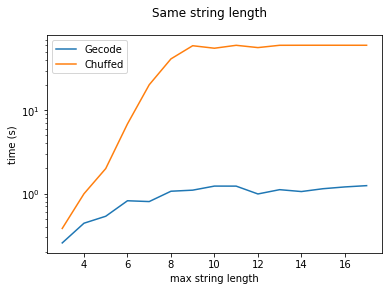

In [17]:
p1 = results1[results1.file.str.contains("p1")]

gc = p1[p1.solver == "Gecode"].groupby("max_str_length").mean()
ch = p1[p1.solver == "Chuffed"].groupby("max_str_length").mean()

plt.plot(gc, label="Gecode")
plt.plot(ch, label="Chuffed")
plt.suptitle("Same string length")
plt.xlabel("max string length")
plt.ylabel("time (s)")
plt.yscale("log")
plt.legend()
plt.savefig("str_length_p1.pdf")

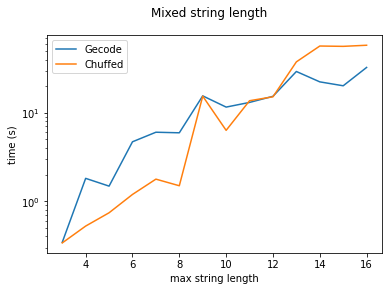

In [22]:
p2 = results1[results1.file.str.contains("p2")]

gc = p2[p2.solver == "Gecode"].groupby("max_str_length").mean()
ch = p2[p2.solver == "Chuffed"].groupby("max_str_length").mean()

plt.plot(gc, label="Gecode")
plt.plot(ch, label="Chuffed")
plt.suptitle("Mixed string length")
plt.xlabel("max string length")
plt.ylabel("time (s)")
plt.yscale("log")
plt.legend()
plt.savefig("str_length_p2.pdf")

In [13]:
path_to_instances = "benchmark_num_str"
all_txt_to_dzn(path_to_instances, sl=10)
results2 = test(path_to_instances)
results2.to_csv("benchmark_num_str.csv")

benchmark_num_str/p1_10_10-0
Found ACAACAACA with score 44 in 1.40s
benchmark_num_str/p1_10_10-1
Found AACAAACAA with score 36 in 1.05s
benchmark_num_str/p1_10_10-2
Found AAAACACAAA with score 42 in 1.01s
benchmark_num_str/p1_10_10-3
Found AAAACAACA with score 42 in 1.08s
benchmark_num_str/p1_10_10-4
Found ACAAAACAA with score 36 in 0.89s
benchmark_num_str/p1_1_10-0
Found AACCCAAAAG with score 0 in 0.13s
benchmark_num_str/p1_1_10-1
Found GAACACCAAA with score 0 in 0.15s
benchmark_num_str/p1_1_10-2
Found ACACAACAAA with score 0 in 0.15s
benchmark_num_str/p1_1_10-3
Found CCAAACACAG with score 0 in 0.16s
benchmark_num_str/p1_1_10-4
Found AAAAACCGAA with score 0 in 0.15s
benchmark_num_str/p1_2_10-0
Found ACAACCAAAA with score 6 in 0.23s
benchmark_num_str/p1_2_10-1
Found AAACAAAAAA with score 8 in 0.36s
benchmark_num_str/p1_2_10-2
Found CACAACAACA with score 4 in 0.32s
benchmark_num_str/p1_2_10-3
Found CAAACAAAAA with score 6 in 0.23s
benchmark_num_str/p1_2_10-4
Found AAAACAACCA with score 

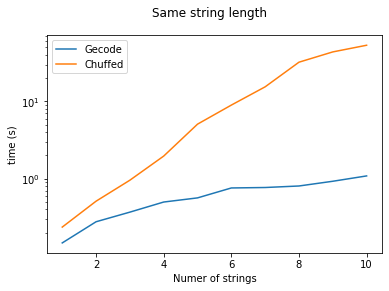

In [21]:
p1 = results2[results2.file.str.contains("p1")]

gc = p1[p1.solver == "Gecode"].groupby("n_str").mean()
ch = p1[p1.solver == "Chuffed"].groupby("n_str").mean()

plt.plot(gc, label="Gecode")
plt.plot(ch, label="Chuffed")
plt.suptitle("Same string length")
plt.xlabel("Numer of strings")
plt.ylabel("time (s)")
plt.yscale("log")
plt.legend()
plt.savefig("num_str.pdf")

In [18]:
problem = "instances/p2/p2_15_20-0"
results3 = pd.DataFrame(columns=["sol_length", "best", "score", "time"])
for sol_length in range(1,21):
    txt_to_dzn(problem + ".txt", sl=sol_length)
    timelimit = 60*1000

    t0 = time.time()
    out = subprocess.check_output([
                            "minizinc",
                            "Minimum_editing_distance.mzn",
                            problem + ".dzn",
                            "--all-solutions",
                            "--time-limit", str(timelimit),
                            "--solver", "Gecode",
                            "--random-seed", "0"
                        ])

    t1 = time.time()
    parsed_out = str(out).split("Results: {")[-1].split("}")[0].split(" ") # get last solution
    best = parsed_out[1]
    score = int(parsed_out[3])
    print(f"Solution length: {sol_length}. Found {best} with score {score} in {t1-t0:.2f}s")
    results3 = results3.append({"sol_length": sol_length, "best": best, "score": score, "time":t1-t0},
                             ignore_index=True)

Solution length: 1. Found A with score 184 in 0.74s
Solution length: 2. Found CA with score 169 in 0.40s
Solution length: 3. Found CGA with score 156 in 0.53s
Solution length: 4. Found CCGA with score 147 in 0.69s
Solution length: 5. Found CTGGA with score 142 in 0.99s
Solution length: 6. Found CTCGGA with score 141 in 1.76s
Solution length: 7. Found CTCGATG with score 138 in 3.93s
Solution length: 8. Found ACTCGATG with score 137 in 11.32s
Solution length: 9. Found ACTCGATG with score 137 in 37.06s
Solution length: 10. Found GATCTCGGAC with score 139 in 60.43s
Solution length: 11. Found GATCTCGGACA with score 144 in 60.44s
Solution length: 12. Found GACTCATGGCAA with score 153 in 60.46s
Solution length: 13. Found GACTCATGGCAAA with score 162 in 60.50s
Solution length: 14. Found GACTACGTCCAAAA with score 175 in 60.52s
Solution length: 15. Found GACTACGTCCAAAAA with score 188 in 60.57s
Solution length: 16. Found ACTCATGGACAAAAAA with score 205 in 60.60s
Solution length: 17. Found ACTCAT

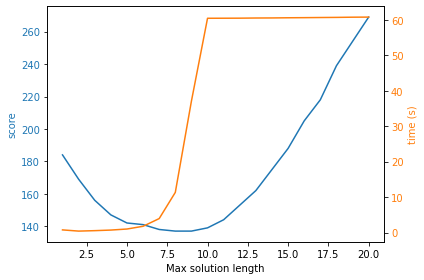

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Max solution length")
ax1.set_ylabel("score", color=color)
ax1.plot(results3.sol_length, results3.score, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel("time (s)", color=color)  # we already handled the x-label with ax1
ax2.plot(results3.sol_length, results3.time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("score_vs_time.pdf")